<h1>Лабораторная работа №5></h1>

<h1>Жээнбеков Эрбол AIN-1-21</h1>

<h3>Применить библиотеки  sсikit-learn и mglearn  для построения моделей классификации и  регрессии. Изучить полученные данные, научиться оценивать качество моделей.</h3>

<h2>Данные по диабету</h2>

In [105]:
from sklearn.datasets import load_diabetes
data_diabetes = load_diabetes()
print(f"Форма массива data для набора diabetes: {data_diabetes.data.shape}")

Форма массива data для набора diabetes: (442, 10)


In [106]:
print(f"Ключи data_diabetes : {data_diabetes.keys()}")

Ключи data_diabetes : dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [107]:
print(data_diabetes["DESCR"] [:1000] + '/n....')

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [108]:
print(f'Имена признаков data_diabetes: {data_diabetes.feature_names}')

Имена признаков data_diabetes: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<h5>Метод KNeighborsRegressor</h5>

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor


X = data_diabetes.data[:, 0:100000]  

y = data_diabetes.target


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [110]:
print(f'Прогнозы для тестового набора: {reg.predict(X_test)}')

Прогнозы для тестового набора: [247.33333333 181.66666667 158.33333333 116.66666667 185.66666667
 222.66666667  81.         218.66666667 163.         270.33333333
 167.66666667 197.66666667 133.33333333  68.33333333 294.
  60.         132.33333333  70.33333333 123.         249.66666667
 207.33333333 155.33333333 167.         108.66666667 203.
 190.33333333 101.66666667  65.33333333 189.33333333 186.33333333
 229.          63.66666667 176.33333333 222.          88.66666667
 161.66666667 190.33333333 110.66666667 118.33333333 161.33333333
 157.         155.33333333 151.66666667 206.66666667 145.
  66.66666667 118.33333333 100.66666667 140.33333333 219.
 116.33333333  77.         204.33333333 124.         275.33333333
 136.66666667 145.66666667 111.33333333 110.66666667 215.33333333
 178.33333333  89.33333333 135.         113.         270.66666667
 162.66666667  57.66666667 284.33333333 196.          84.33333333
 131.33333333 169.33333333  80.         110.33333333 166.33333333
 126.333333

In [111]:
print(f"{reg.score(X_test,y_test)}")

0.1475311393015417


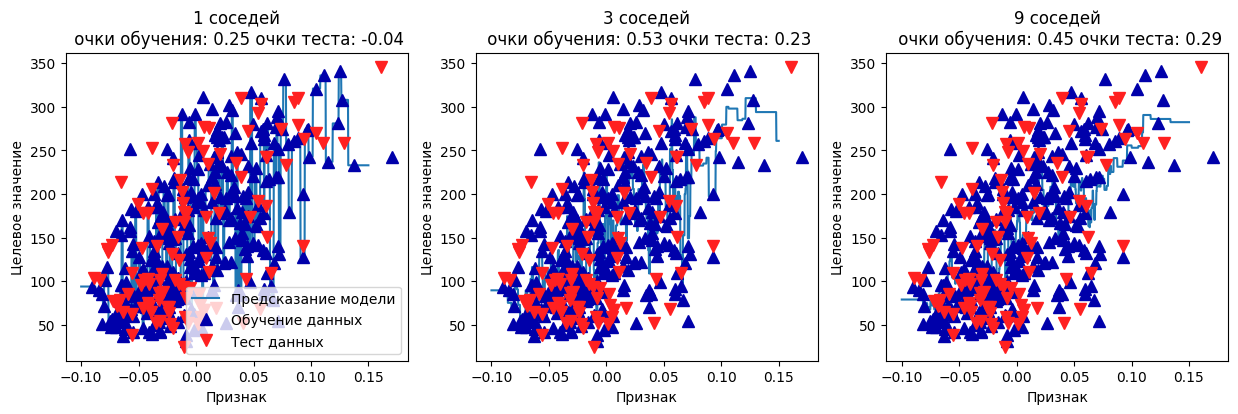

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_diabetes.data[:, 2:3], data_diabetes.target, random_state=66)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-0.1, 0.15, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} соседей\n очки обучения: {:.2f} очки теста: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test))
    )
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевое значение")

axes[0].legend(["Предсказание модели", "Обучение данных", "Тест данных"], loc="best")

plt.show()


<h3>Линейные модели регрессии</h3>

In [113]:
from sklearn.linear_model import LinearRegression
X = data_diabetes.data[:, 0:100000]  
y = data_diabetes.target


X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)


In [114]:
print(f"коэффицент:{lr.coef_}")
print(f"отрезок прямой: {lr.intercept_}")


коэффицент:[  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
отрезок прямой: 151.6651755919933


In [115]:

print(f'{lr.score(X_train, y_train)}')
print(f'{lr.score(X_test, y_test)}')


0.519034189167905
0.4849058889476754


In [116]:
from sklearn.linear_model import Ridge
X = data_diabetes.data  
y = data_diabetes.target

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0)
ridge = Ridge().fit(X_train, y_train)
print(f"Правильность на обучающем наборе :{ridge.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе :{ridge.score(X_test, y_test)}")


Правильность на обучающем наборе :0.4625420370188341
Правильность на тестовом наборе :0.3569596077458861


In [117]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f"Правильность на обучающем наборе :{ridge01.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе :{ridge01.score(X_test, y_test)}")

Правильность на обучающем наборе :0.5502014591285382
Правильность на тестовом наборе :0.369025054374998


In [118]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f"Правильность на обучающем наборе :{ridge10.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе :{ridge10.score(X_test, y_test)}")

Правильность на обучающем наборе :0.17131356091679695
Правильность на тестовом наборе :0.14333099992172604


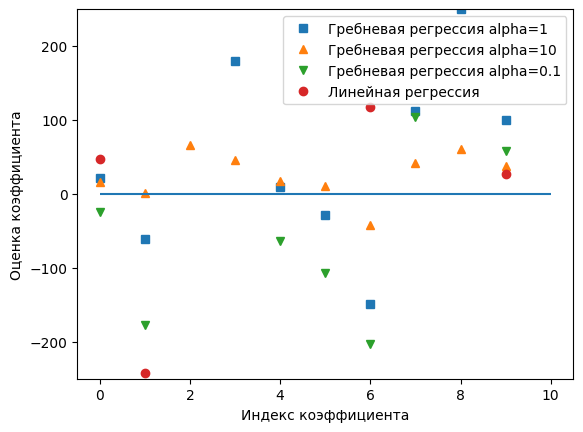

In [119]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-250, 250)
plt.legend()

Метод Лассо

In [120]:
from sklearn.linear_model import Lasso


lasso = Lasso()  
lasso.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso.coef_ != 0)}")


Правильность на обучающем наборе: 0.41412350907212847
Правильность на тестовом наборе: 0.27818075944340903
Количество использованных признаков: 2


In [121]:
lasso001 = Lasso(alpha=0.01, max_iter=1000000) 
lasso001.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso001.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso001.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso001.coef_ != 0)}")

Правильность на обучающем наборе: 0.5546176295142069
Правильность на тестовом наборе: 0.354122216566946
Количество использованных признаков: 9


In [122]:
lasso0001 = Lasso(alpha=0.0001, max_iter=1000000)  # You need to specify the alpha (regularization strength) here
lasso0001.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso0001.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso0001.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso0001.coef_ != 0)}")

Правильность на обучающем наборе: 0.5554335853194698
Правильность на тестовом наборе: 0.359344919782672
Количество использованных признаков: 10


Text(0, 0.5, 'Оценка коэффициента')

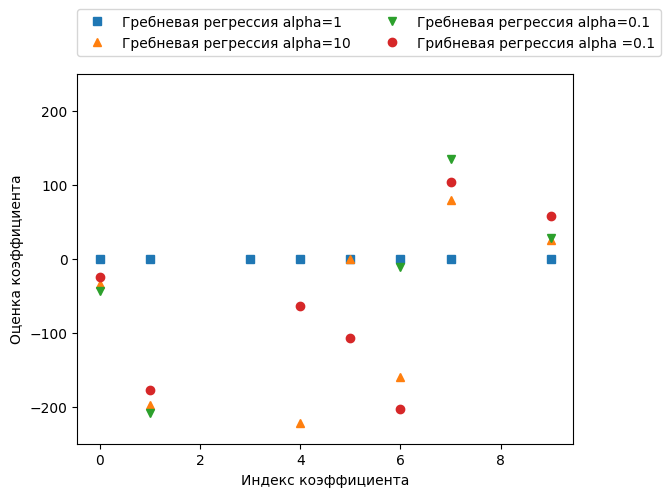

In [123]:
plt.plot(lasso.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(lasso001.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(lasso0001.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(ridge01.coef_, 'o', label="Грибневая регрессия alpha =0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-250, 250)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

In [124]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)

print(f"Правильность обучения на обучающем наборе: {train_accuracy}")
print(f"Правильность обучения на тестовом наборе: {test_accuracy}")


Правильность обучения на обучающем наборе: 0.03323262839879154
Правильность обучения на тестовом наборе: 0.009009009009009009


In [125]:
logreg100 = LogisticRegression(C=100)
logreg100.fit(X_train, y_train)


train_accuracy = logreg100.score(X_train, y_train)
test_accuracy = logreg100.score(X_test, y_test)

print(f"Правильность обучения на обучающем наборе: {train_accuracy}")
print(f"Правильность обучения на тестовом наборе: {test_accuracy}")

Правильность обучения на обучающем наборе: 0.1782477341389728
Правильность обучения на тестовом наборе: 0.009009009009009009


In [126]:
logreg001 = LogisticRegression(C=0.01)
logreg001.fit(X_train, y_train)

train_accuracy = logreg001.score(X_train, y_train)
test_accuracy = logreg001.score(X_test, y_test)

print(f"Правильность обучения на обучающем наборе: {train_accuracy}")
print(f"Правильность обучения на тестовом наборе: {test_accuracy}")

Правильность обучения на обучающем наборе: 0.030211480362537766
Правильность обучения на тестовом наборе: 0.009009009009009009


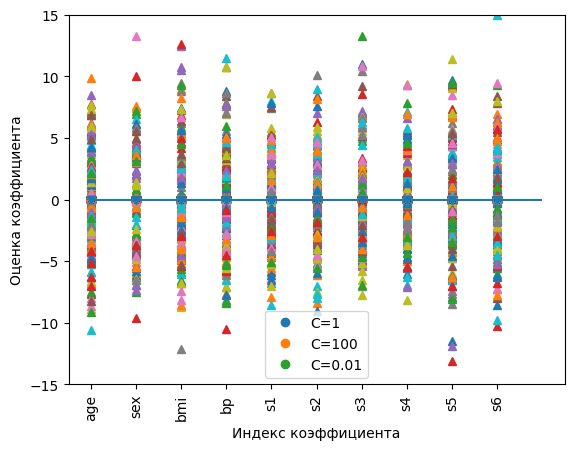

In [127]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(logreg.coef_.T, 'o')
plt.plot(logreg100.coef_.T, '^')
plt.plot(logreg001.coef_.T, 'v')
plt.xticks(np.arange(data_diabetes.data.shape[1]), data_diabetes.feature_names, rotation=90)
plt.hlines(0, 0, data_diabetes.data.shape[1])
plt.ylim(-15, 15)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend(['C=1', 'C=100', 'C=0.01'])
plt.show()


<h3>Данные о физических упражнениях</h3>

In [128]:
from sklearn.datasets import load_linnerud
data_linnerud = load_linnerud()
print(f"Форма массива data для набора data_linnerud: {data_linnerud.data.shape}")

Форма массива data для набора data_linnerud: (20, 3)


In [129]:
print(f"Ключи data_linnerud: {data_linnerud.keys()}")

Ключи data_linnerud: dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [130]:
print(f'Имена признаков data_linnerud: {data_linnerud.feature_names}')

Имена признаков data_linnerud: ['Chins', 'Situps', 'Jumps']


In [131]:
print(data_linnerud["DESCR"] [:750] + '/n....')

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

|details-start|
**References**
|details-split|

* Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
  Editions Technic.

|details-end|/n....


In [132]:
X = data_linnerud.data  
y = data_linnerud.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Количество признаков data_linnerud:", data_linnerud.data.shape[1])


Количество признаков data_linnerud: 3


<h5>Линейная модель регрессии</h5>

In [133]:
from sklearn.linear_model import LinearRegression
lrr = LinearRegression().fit(X_train, y_train)

In [134]:
print(f"коэффиценты :{lrr.coef_}")
print(f"отрезок прямой: {lrr.intercept_}")

коэффиценты :[[ 0.45032944 -0.31848005  0.09103322]
 [-0.07820805 -0.04851095  0.02797324]
 [-0.48276697  0.09321505 -0.05008643]]
отрезок прямой: [210.17957378  40.92073283  52.01086926]


In [135]:
print(f'{lrr.score(X_train, y_train)}')
print(f'{lrr.score(X_test, y_test)}')

0.37238164270359136
-1.3504115542086372


In [136]:
from sklearn.linear_model import Ridge

ridgee = Ridge().fit(X_train,y_train)
print(f"{ridgee.score(X_train,y_train)}")
print(f"{ridgee.score(X_test,y_test)}")


0.37238106176377334
-1.3467840202317147


In [137]:
ridgee10 = Ridge(alpha=10).fit(X_train,y_train)

print(f"{ridgee10.score(X_train,y_train)}")
print(f"{ridgee10.score(X_test,y_test)}")

0.3723288001810914
-1.3160818062747286


In [138]:
ridgee01 = Ridge(alpha=0.1).fit(X_train,y_train)

print(f"{ridgee01.score(X_train,y_train)}")
print(f"{ridgee01.score(X_test,y_test)}")

0.37238163683740905
-1.350046734349969


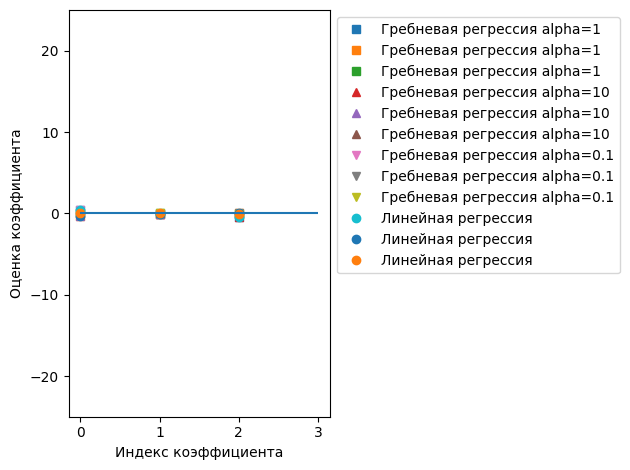

In [139]:
plt.plot(ridgee.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridgee10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridgee01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lrr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lrr.coef_))
plt.ylim(-25, 25)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.show()

Метод Лассо

In [140]:
from sklearn.linear_model import Lasso

lasso = Lasso()  
lasso.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso.coef_ != 0)}")

Правильность на обучающем наборе: 0.3695371044216506
Правильность на тестовом наборе: -1.288635773825759
Количество использованных признаков: 8


In [141]:
lasso001 = Lasso(alpha=0.01, max_iter=1000000) 
lasso001.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso001.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso001.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso001.coef_ != 0)}")

Правильность на обучающем наборе: 0.3723813498968623
Правильность на тестовом наборе: -1.3496239932780159
Количество использованных признаков: 9


In [142]:
lasso0001 = Lasso(alpha=0.0001, max_iter=1000000)  
lasso0001.fit(X_train, y_train)

print(f"Правильность на обучающем наборе: {lasso0001.score(X_train, y_train)}")
print(f"Правильность на тестовом наборе: {lasso0001.score(X_test, y_test)}")
print(f"Количество использованных признаков: {np.sum(lasso0001.coef_ != 0)}")

Правильность на обучающем наборе: 0.3723816426746993
Правильность на тестовом наборе: -1.3504035835281165
Количество использованных признаков: 9


Text(0, 0.5, 'Оценка коэффициента')

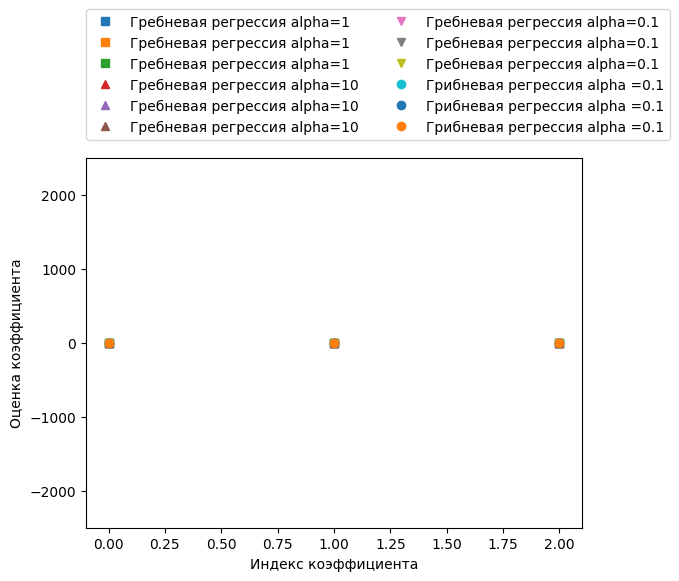

In [143]:
plt.plot(lasso.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(lasso001.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(lasso0001.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(ridgee01.coef_, 'o', label="Грибневая регрессия alpha =0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-2500, 2500)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

In [144]:
X = data_linnerud.data  
y = data_linnerud.target
y_1d = y[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y_1d, test_size=0.2, random_state=42)
y_1d

array([36., 37., 38., 35., 35., 36., 38., 34., 31., 33., 34., 33., 34.,
       46., 36., 37., 37., 32., 33., 33.])

In [145]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train, y_train)

train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)

print(f"Правильность на обучающем наборе: {train_accuracy}")
print(f"Правильность на тестовом наборе: {test_accuracy}")

Правильность на обучающем наборе: 0.8125
Правильность на тестовом наборе: 0.0


c:\Users\User\Desktop\big_data\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
logreg100 = LogisticRegression(C=1, max_iter=1000000)
logreg100.fit(X_train, y_train)


train_accuracy = logreg100.score(X_train, y_train)
test_accuracy = logreg100.score(X_test, y_test)

print(f"Правильность на обучающем наборе: {train_accuracy}")
print(f"Правильность на тестовом наборе: {test_accuracy}")

Правильность на обучающем наборе: 0.8125
Правильность на тестовом наборе: 0.0


c:\Users\User\Desktop\big_data\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
logreg001 = LogisticRegression(C=0.01,max_iter=100000)
logreg001.fit(X_train, y_train)

train_accuracy = logreg001.score(X_train, y_train)
test_accuracy = logreg001.score(X_test, y_test)

print(f"Правильность на обучающем наборе: {train_accuracy}")
print(f"Правильность на тестовом наборе: {test_accuracy}")

Правильность на обучающем наборе: 0.6875
Правильность на тестовом наборе: 0.0


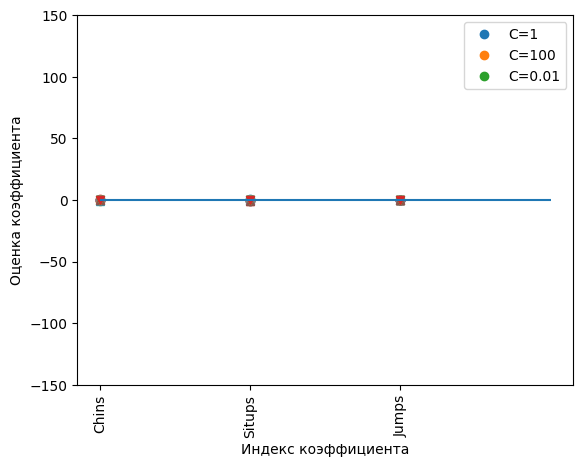

In [148]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(logreg.coef_.T, 'o')
plt.plot(logreg100.coef_.T, '^')
plt.plot(logreg001.coef_.T, 'v')
plt.xticks(np.arange(data_linnerud.data.shape[1]), data_linnerud.feature_names, rotation=90)
plt.hlines(0, 0, data_linnerud.data.shape[1])
plt.ylim(-150, 150)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend(['C=1', 'C=100', 'C=0.01'])
plt.show()